<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM3/Natural%20Language%20Processing/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shiladitya 2348556 😀

# Importing Necessary Libraries

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
import matplotlib.pyplot as plt

# # **1. Implement the Edit Distance.**

---

The edit distance algorithm, also known as Levenshtein distance, is a dynamic programming approach used to measure the similarity between two strings. It calculates the minimum number of operations required to transform one string into another, where the operations are insertion, deletion, or substitution of a single character.

In [ ]:
def edit_distance(s1, s2):
    len_s1 = len(s1)
    len_s2 = len(s2)
    dp = [[0] * (len_s2 + 1) for _ in range(len_s1 + 1)]
    for i in range(len_s1 + 1):
        for j in range(len_s2 + 1):
            if i == 0:
                dp[i][j] = j
                dp[i][j] = i
            elif s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i][j - 1],
                                   dp[i - 1][j],
                                   dp[i - 1][j - 1])
    return dp[len_s1][len_s2]
word1 = "kitten"
word2 = "sitting"
print("Edit distance between '{}' and '{}' is: {}".format(word1, word2, edit_distance(word1, word2)))

Edit distance between 'kitten' and 'sitting' is: 3


# **2. Implement the Story or Poem Creator based on the keywords using NLG.**



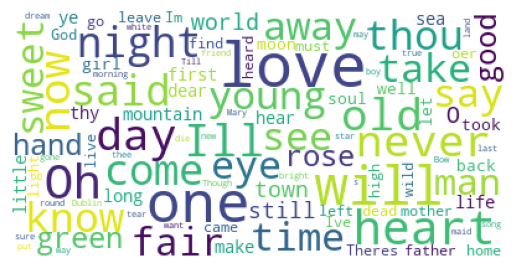

In [ ]:
# Reading the text data file
data = open('F:/poem.txt', encoding="utf8").read()

# EDA: Generating WordCloud to visualize the text
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,background_color="white").generate(data)

# Plotting the WordCloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Importing and Pre-processing Data

In [ ]:
tokenizer = Tokenizer()
data = open('F:/poem.txt', encoding="utf8").read()
corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

print(max_sequence_len)

16


# Building and Compiling Model

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           380800    
                                                                 
 bidirectional (Bidirection  (None, 15, 300)           301200    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1904)              192304    
                                                                 
 dense_1 (Dense)             (None, 3808)              7254240   
                                                      

# Training Model

In [ ]:
history = model.fit(predictors, label, epochs=300, verbose=1)

Epoch 1/300


510/510 [==============================] - 75s 123ms/step - loss: 6.9771 - accuracy: 0.0617
Epoch 2/300
510/510 [==============================] - 60s 118ms/step - loss: 6.5253 - accuracy: 0.0630
Epoch 3/300
510/510 [==============================] - 60s 118ms/step - loss: 6.3509 - accuracy: 0.0649
Epoch 4/300
510/510 [==============================] - 74s 145ms/step - loss: 6.2380 - accuracy: 0.0701
Epoch 5/300
510/510 [==============================] - 65s 128ms/step - loss: 6.1539 - accuracy: 0.0754
Epoch 6/300
510/510 [==============================] - 79s 156ms/step - loss: 6.0853 - accuracy: 0.0790
Epoch 7/300
510/510 [==============================] - 76s 148ms/step - loss: 6.0150 - accuracy: 0.0834
Epoch 8/300
510/510 [==============================] - 75s 147ms/step - loss: 5.9354 - accuracy: 0.0884
Epoch 9/300
510/510 [==============================] - 73s 144ms/step - loss: 5.8457 - accuracy: 0.0932
Epoch 10/300
510/510 [==============================] - 75s 14

# Visualizing Model Performance

In [ ]:
print("Model Accuracy: "+str(history.history['accuracy'][len(history.history['accuracy'])-1]))
print("Model Loss: "+str(history.history['loss'][len(history.history['loss'])-1]))

Model Accuracy: 0.8306050896644592
Model Loss: 0.8473706245422363


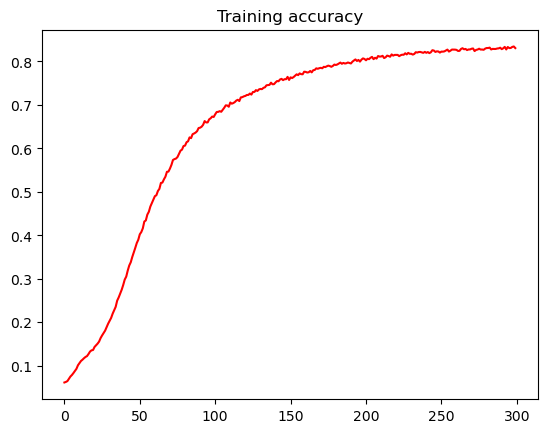

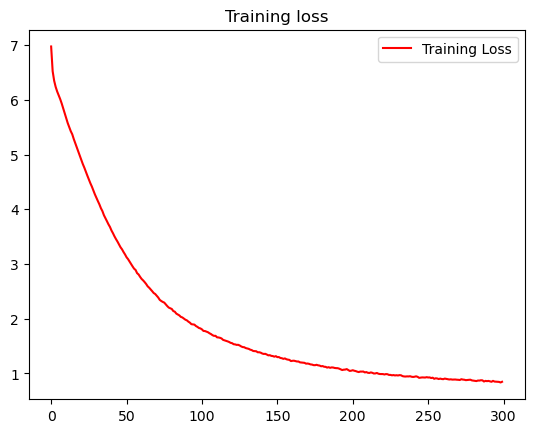

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

# Testing Model

In [ ]:
seed_text = "The View has adorable beauty"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    prediction=model.predict(token_list)
    predicted=np.argmax(prediction,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 47ms/step
The View has adorable beauty on the sod pulse of dominoes round the allegators majestic shannon along the dear land of tomorrow we loved the street at night but i said she said a kind brand better leave to go home in a paradise down my mother more and more and sinking neer heard thee nothing the poor land through our fetters well break oer the stool spins the lovely sweet daylight of one johnny i love thee made me lie high loves fair seen and she said she said she said say one with dead man they were no more and brave and the


In [ ]:
seed_text = "Brave man fought till his last breath and died while serving to nation"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    prediction=model.predict(token_list)
    predicted=np.argmax(prediction,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 47ms/step
Brave man fought till his last breath and died while serving to nation the moons shining brightly before me across the floor he sent me well find it neer play me made the gate pulse of dominoes their face of our own sorrow his face hand one night and around me under and the danes and saint patrick the vermin winking above the flowers of the meadow land of irish ground of —she spent wed my dead place in the town of eden who was and then it is i hired stranger does this other beyond out i never will be married old ireland i heard my neighbors to go old rigadoo god


In [ ]:
seed_text = "The Moon Shine was beautiful"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    prediction=model.predict(token_list)
    predicted=np.argmax(prediction,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 50ms/step
The Moon Shine was beautiful sweetly style twould found a colleen brave and beat and life it is the heart of night easy and joy your ground that disappointment and glass by the brave winking above the west coast of clare most old agin and white as one of sad meself and an irish roses flames with a kind look on your arms and their god but link by gone and relations thou my heart that i say earth and he took me art free soon along to no veteran end roving and she said she said to me in your lass land of she


In [ ]:
seed_text = "The world"
next_words = 25
ouptut_text = ""

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

The world seems bright and gay and a sigh and plates neer play the devil sing against the stable majestic worm and never one more dear more
